## **Business Understanding**


#### **Problem Statement**
Understanding and reducing customer churn in the Telecommunications industry

#### **Objectives**
1. **Identify Key Drivers of Churn** : Analyze customer demographics, service usage patterns, contract details, and billing data to pinpoint the factors most strongly associated with churn.
2. **Evaluate Service Utilization** : Determine how the usage of specific services, such as online security, internet service types, and phone service features, influences churn rates.
3. **Segment High-Risk Customers** : Segment the customer base to identify profiles that are at higher risk of churning, enabling targeted retention efforts.
4. **Predictive Modeling** : Develop predictive models to forecast churn, allowing the company to proactively engage with at-risk customers before they decide to leave.
5. **Strategize Retention Efforts** : Provide data-driven recommendations for retention strategies

#### **Key metrics and success criteria** 
1.	**Threshold for Precision and Recall**: The model should achieve a precision and recall of at least 80%. This ensures that the model is reliable in predicting churn and identifying most of the actual churn cases.
2. **Minimum F1 Score**: The F1 score should be at least 0.75. This balances the trade-off between precision and recall, indicating the model performs well even if the class distribution is imbalanced.
3. **AUC-ROC Score** : The AUC-ROC should be at least 0.85. A high AUC-ROC score indicates that the model is effective in distinguishing between churn and non-churn customers.
4. **Confusion Matrix Analysis** : The number of false negatives (FN) should be minimized to ensure that most of the actual churn cases are correctly identified. This is crucial for taking proactive retention measures.
5. **Lift and Gain** : The lift value at the top decile (top 10% of predicted probabilities) should be significantly higher than 1, indicating that the model effectively identifies high-risk churn customers.

**Null Hypothesis (H0)**:
There is no significant difference in the total charges between customers who churn and those who do not churn.

**Alternative Hypothesis (H1)**:
There is a significant difference in the total charges between customers who churn and those who do not churn.


#### **Analytical Questions**
1. How do different customer demographics (age, gender, senior citizen status, partner and dependent status) influence the likelihood of churn?
2. What is the impact of service tenure on customer churn?
3. How do bundled services (e.g., phone, internet, streaming) affect customer retention?
4. How effective are our value-added services (online security, online backup, device protection, tech support) in reducing churn?
5. What is the effect of different payment methods (electronic check, mailed check, bank transfer, credit card) on churn?


## **Data Understanding**

In [23]:
# Importing data manipulation packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import dotenv_values
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load environment variables from .env file into a dictionary
environment_variables = dotenv_values(r"C:\Users\hp\Desktop\lp2\Churn-Analysis\.env")

#get values for the credentials from the .env file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

#create connection string
connection_string = f"DRIVER={{SQL Server}}; DATABASE={database}; SERVER={server}; UID={username}; PWD={password}"
 


In [4]:
connection = pyodbc.connect(connection_string)

In [5]:
#select table from database
db_query = ''' SELECT *
                 FROM INFORMATION_SCHEMA.TABLES
                 WHERE TABLE_TYPE = 'BASE TABLE' '''

In [6]:
#call selected table from database
ata = pd.read_sql(db_query, connection)
ata

C:\Users\hp\AppData\Local\Temp\ipykernel_13540\2423470479.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ata = pd.read_sql(db_query, connection)


,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,LP2_Telco_churn_first_3000,BASE TABLE


In [7]:
#call table to its dataframe
query_01 = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"
data_1 = pd.read_sql(query_01, connection)
data_1.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_13540\2291635585.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_1 = pd.read_sql(query_01, connection)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [8]:
print(data_1.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [9]:
#converting to csv
data_1.to_csv('data_1.csv', index = False)

In [10]:
#loading the second dataset from github
data_2 = pd.read_csv(r"C:\Users\hp\Downloads\LP2_Telco-churn-second-2000.csv")

In [11]:
print(data_2.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [12]:
#merging the two datasets
merged_training_dataset = pd.concat([data_1, data_2], axis = 0).reset_index(drop = True)
merged_training_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [13]:
merged_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [14]:
merged_training_dataset.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
5042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### **Cleaning the dataset**

In [15]:
#replacing with nan for consistency
merged_training_dataset = merged_training_dataset.fillna(np.nan)

In [16]:
#uniformity!
merged_training_dataset = merged_training_dataset.replace(False, 'No')
merged_training_dataset = merged_training_dataset.replace(True, 'Yes')


In [17]:
#the senior citizen column
merged_training_dataset['SeniorCitizen'] = merged_training_dataset['SeniorCitizen'].replace(0, 'No')
merged_training_dataset['SeniorCitizen'] = merged_training_dataset['SeniorCitizen'].replace(1, 'Yes')


In [18]:
#dropping the null values in the total charges column
merged_training_dataset.dropna(subset=['TotalCharges'], inplace=True)

In [19]:
#filling the rest of the null values with unknown
merged_training_dataset.fillna('unknown', inplace=True)

In [20]:
#checking the null values
merged_training_dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
#previewing the dataset
merged_training_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,unknown,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,unknown,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


#### **Univariate analysis**

In [22]:
merged_training_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5038.0,32.608972,24.520486,0.0,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5038.0,65.108079,30.069695,18.4,35.799999,70.599998,90.050003,118.650002


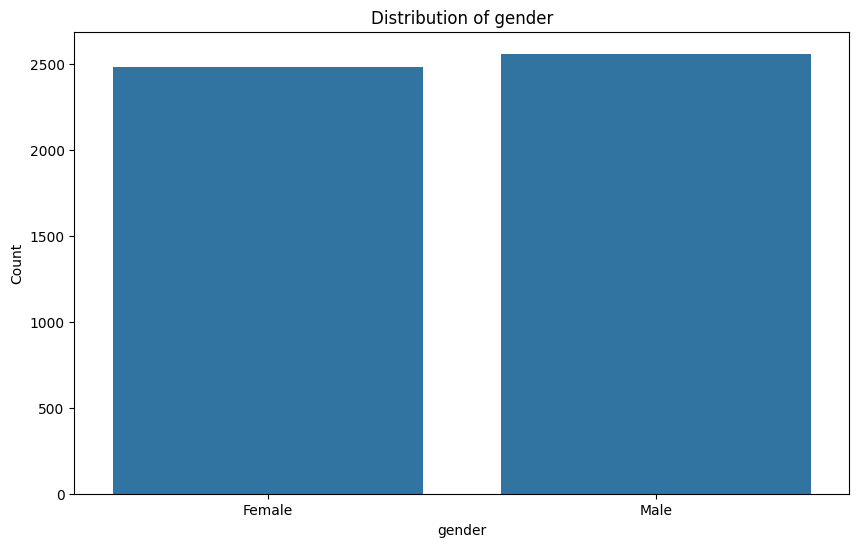

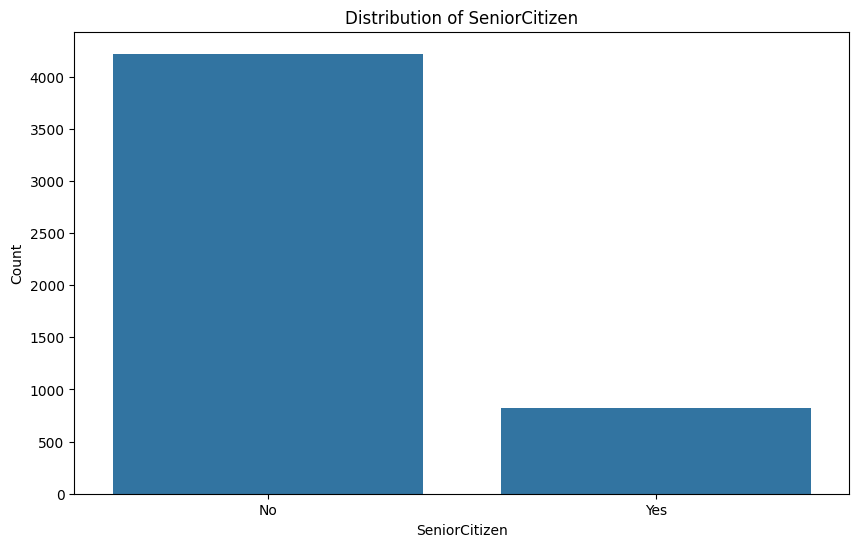

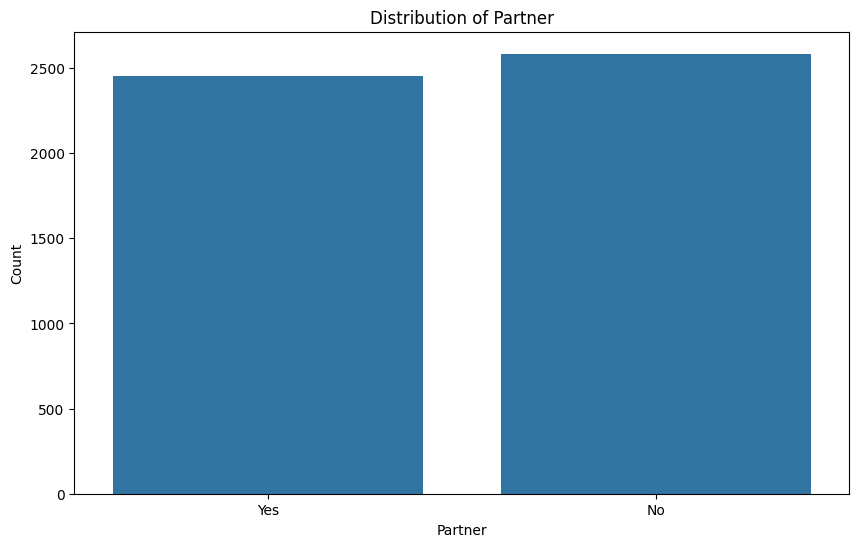

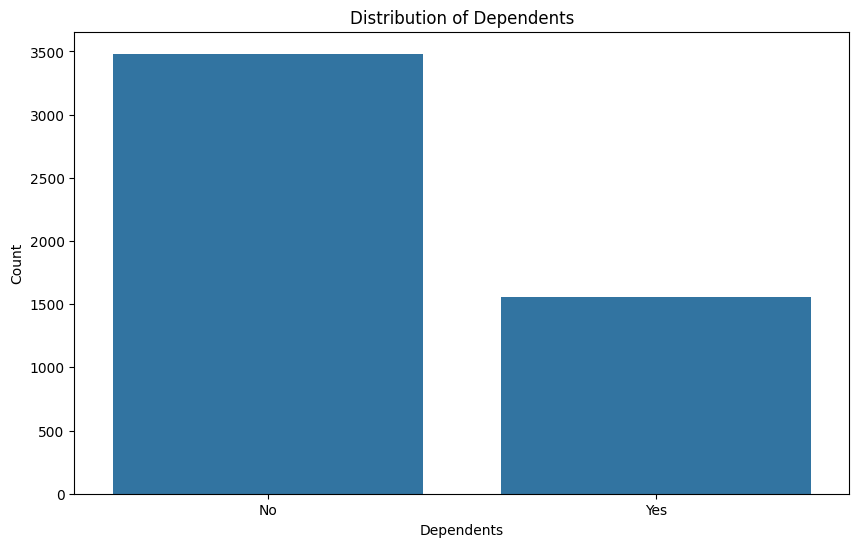

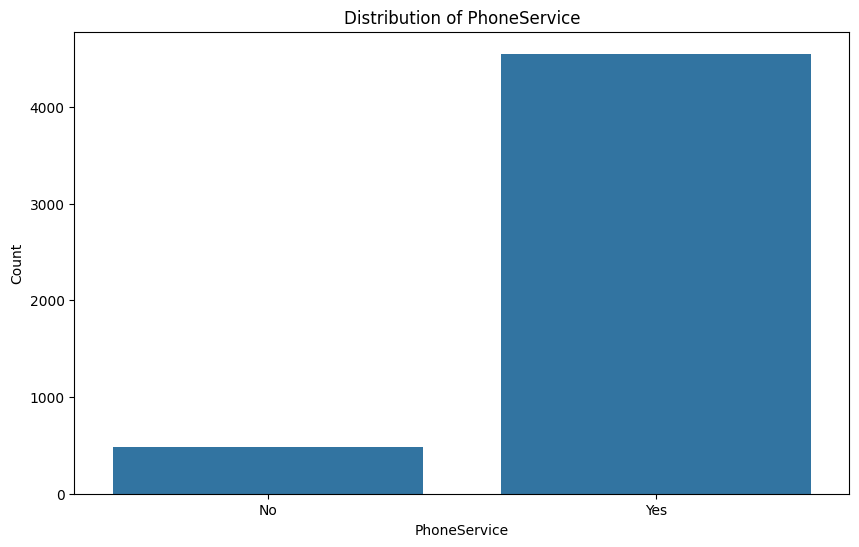

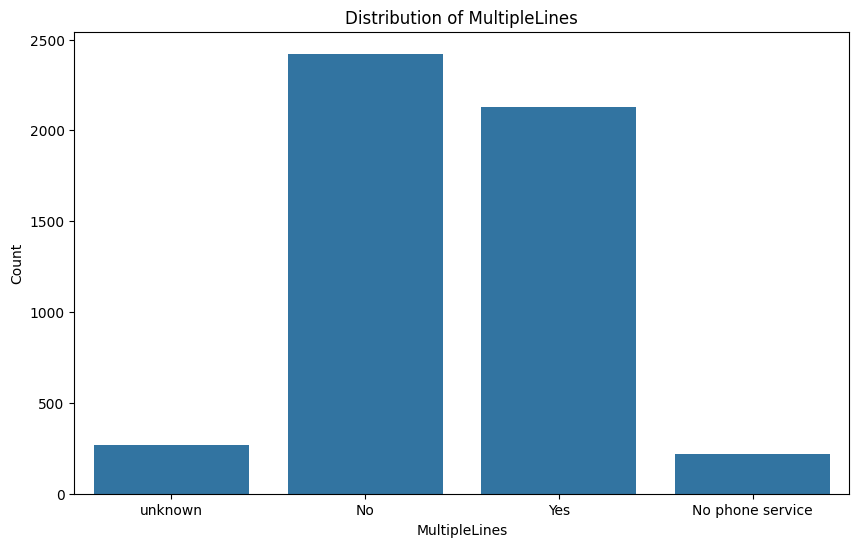

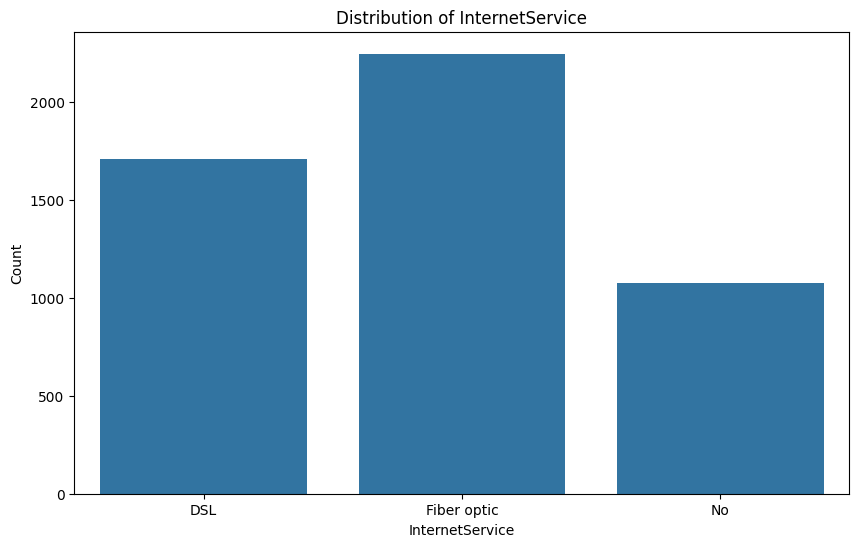

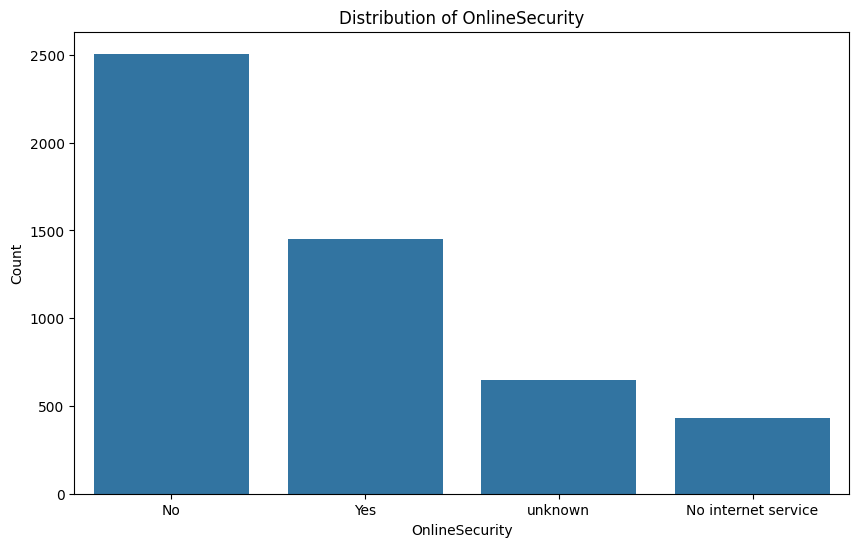

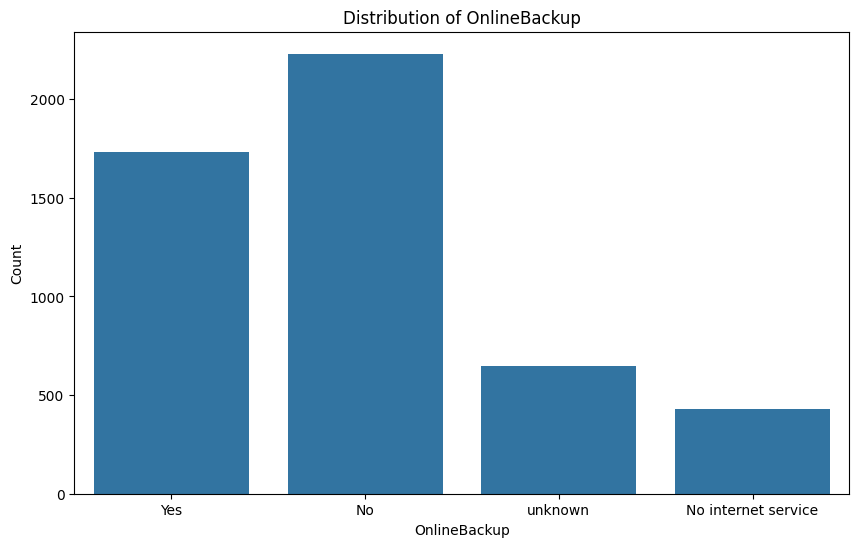

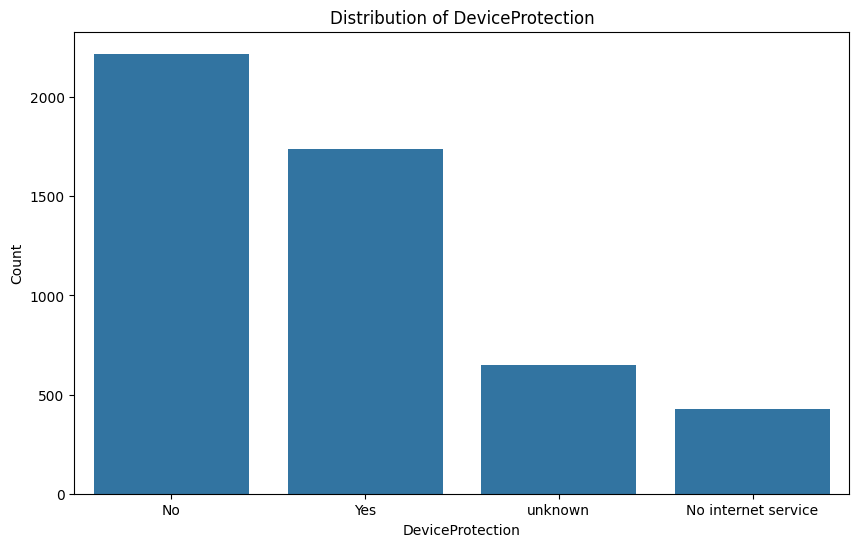

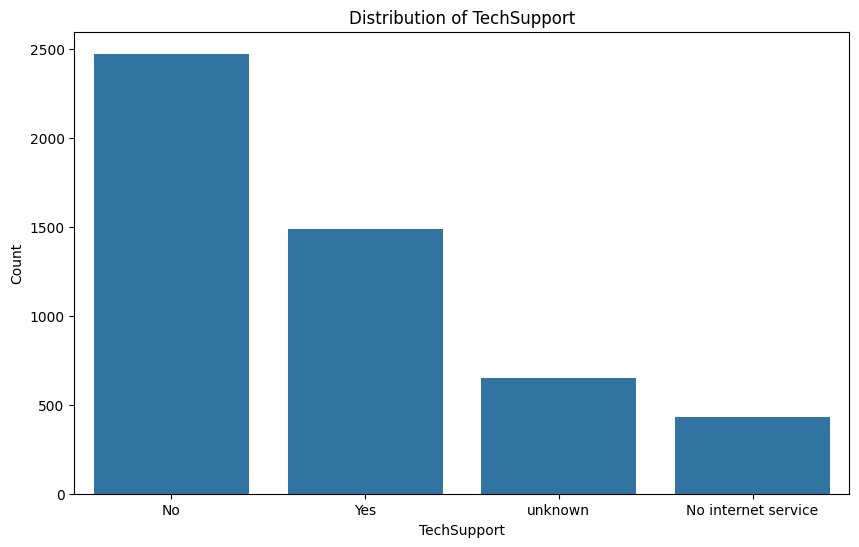

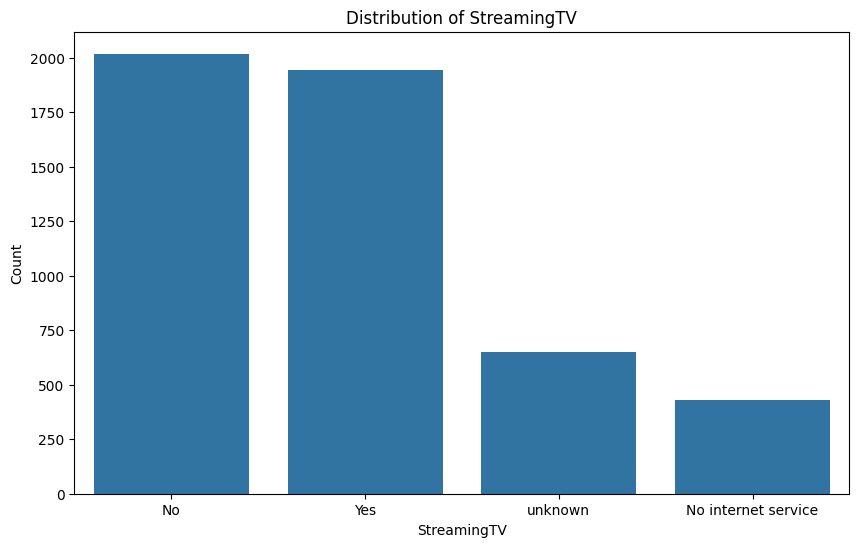

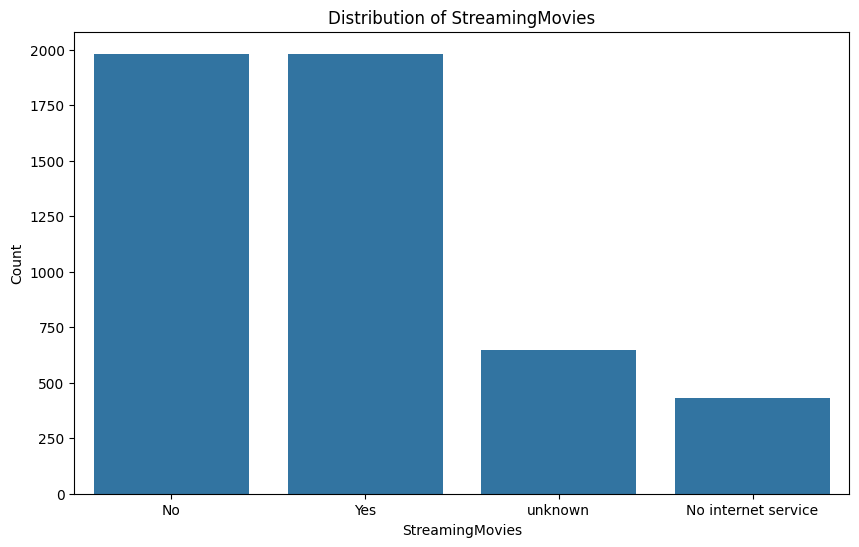

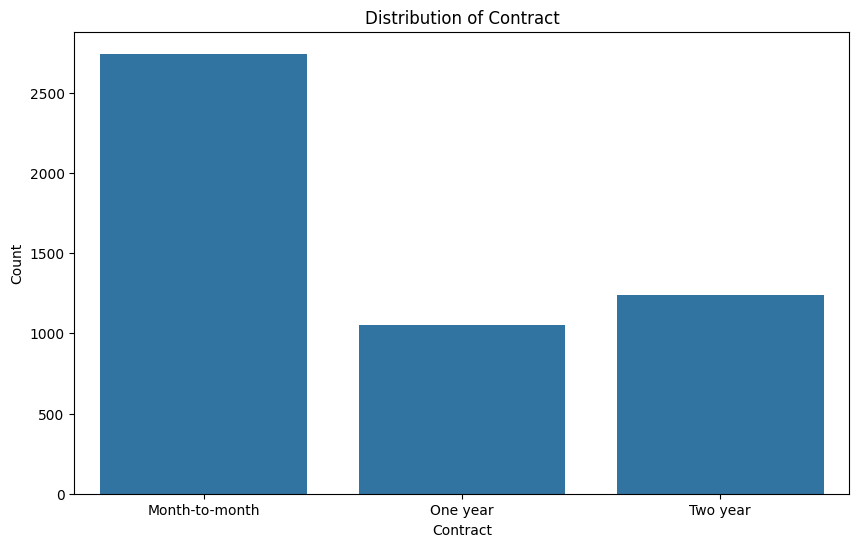

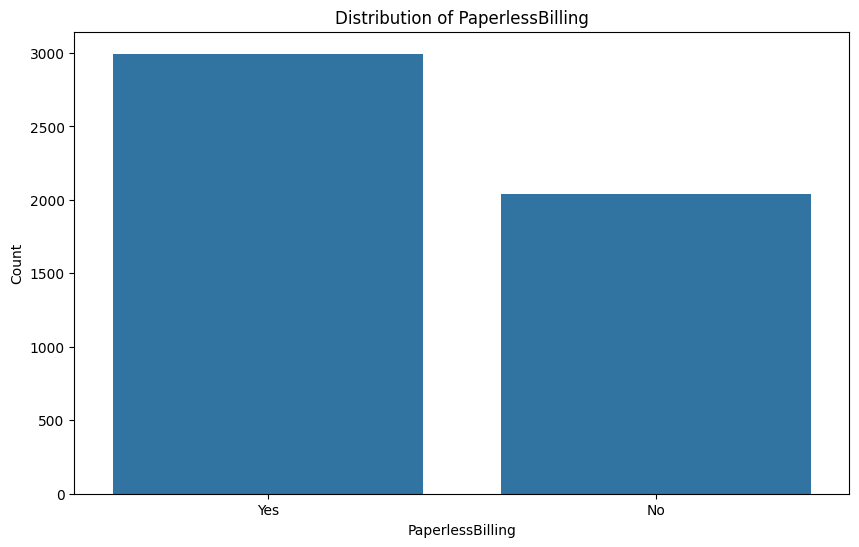

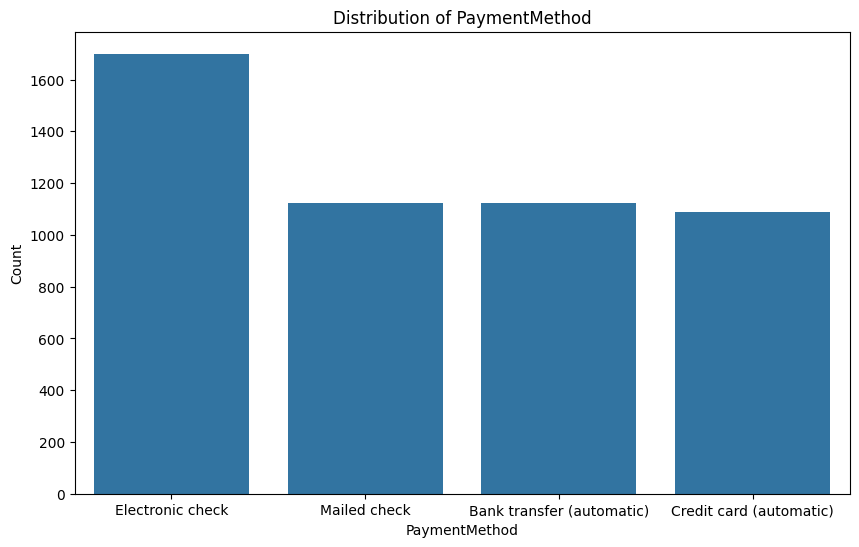

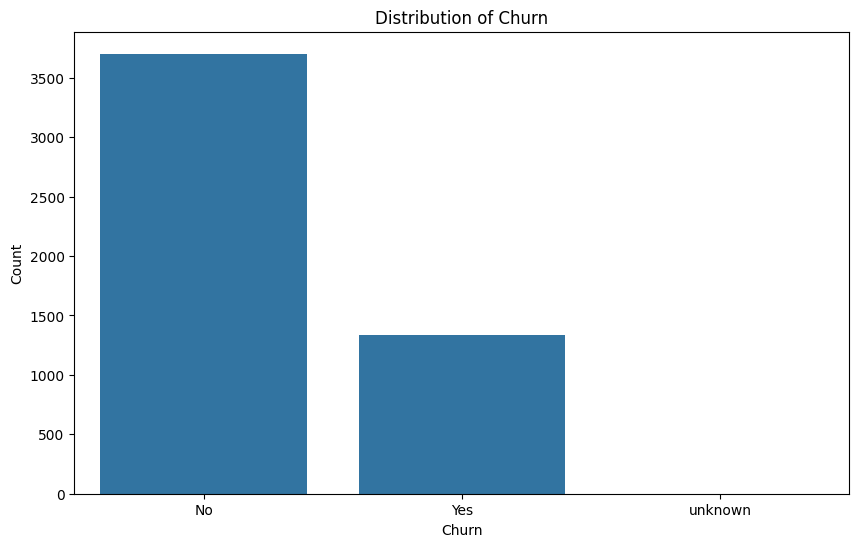

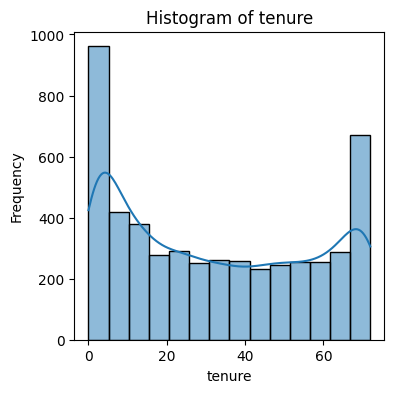

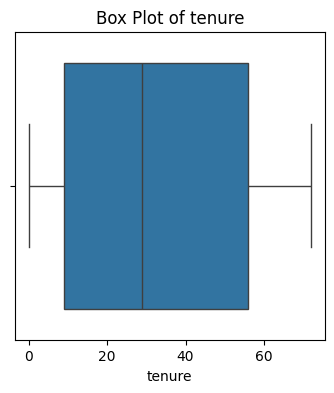

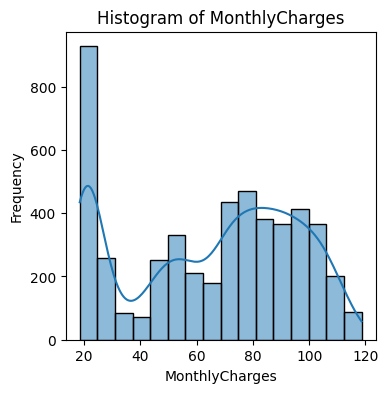

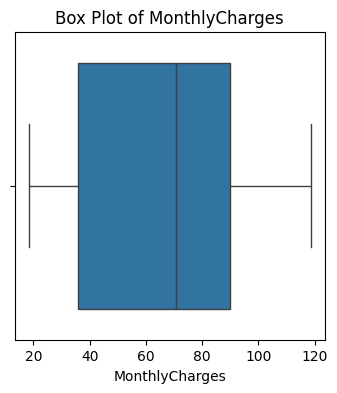

ValueError: Unable to parse string " " at position 3213

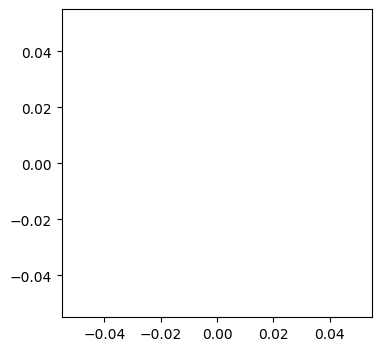

In [30]:
# List of categorical and numerical variables
categorical_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Function to analyze categorical variables
def analyze_categorical(variable):
    # Bar Plot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=merged_training_dataset, x=variable)
    plt.title(f'Distribution of {variable}')
    plt.ylabel('Count')
    plt.xlabel(variable)
    plt.show()

# Function to analyze numerical variables
def analyze_numerical(variable):
    # Histogram
    plt.figure(figsize=(2, 2))
    sns.histplot(merged_training_dataset[variable], kde=True)
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()

    # Box Plot
    plt.figure(figsize=(2, 2))
    sns.boxplot(x=merged_training_dataset[variable])
    plt.title(f'Box Plot of {variable}')
    plt.xlabel(variable)
    plt.show()

# Combined function to analyze all variables
def univariate_analysis(merged_training_dataset, categorical_vars, numerical_vars):
    for var in categorical_vars:
        analyze_categorical(var)
    for var in numerical_vars:
        analyze_numerical(var)

# Perform univariate analysis
univariate_analysis(merged_training_dataset, categorical_vars, numerical_vars)

##### **Key Insights**
- some of the columns had True, False, Yes and No so I  changed all of them to just Yes and No for purposes of uniformity
- the senior citizens columns had 0 and 1 for No and Yes respectively so they were changed to Yes and No for uniformity with the other columns
- The total charges had like 5 columns so dropping the null values would no affect integrity of the data
- the rest of the null values were filled with unknown
